In [9]:
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd


#Later for recommnedation of a song from clusters
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import random
from IPython.display import IFrame


#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

# The "sp" variable has two useful funtions:
# The first usefull function is:
# .search(q='',limit=n)
# .search(q="track:"+song_name+" artist:"+artist_name,limit=5) to restrict to a song name and artist.
# Where the "q" keyword is the query you want to perform on spotify: song_name, artist,...
# while The "limit" keyword will limit the number of returned results.
#
# The second usefull function is:
# .audio_features([URL|URI|ID])
# which returns some 'features of the song', that after cleanup, we can use in order to characterize a song.

#results = sp.search(q="daddy cool",limit=3,market="KE")
#results
#json_results = json.dumps(results, ensure_ascii=True)
#json_results
#results['tracks']['items'][0]['external_urls']["spotify"]

## Searching a playlist

Playlist1

- 37i9dQZF1DZ06evO2YYssE

In [17]:
playlist = sp.user_playlist_tracks("spotify", "37i9dQZF1DZ06evO2YYssE",market="GB")
playlist

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DZ06evO2YYssE/tracks?offset=0&limit=100&market=GB&additional_types=track',
 'items': [{'added_at': '2023-04-28T13:06:19Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_group': 'single',
     'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/54R6Y0I7jGUCveDTtI21nb'},
       'href': 'https://api.spotify.com/v1/artists/54R6Y0I7jGUCveDTtI21nb',
       'id': '54R6Y0I7jGUCveDTtI21nb',
       'name': 'Boney M.',
       'type': 'artist',
       'uri': 'spotify:artist:54R6Y0I7jGUCveDTtI21nb'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/2B780cgk4dXO3GK2l9NBnn'},
     'href': 'https://api.spotify.com/v1/albums/2B780cgk4dXO3GK2l9NBnn',
     'id'

In [19]:
type(playlist)#https://open.spotify.com/playlist/37i9dQZF1DZ06evO2YYssE

dict

In [20]:
len(playlist["items"])

51

In [21]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [22]:
track1=get_playlist_tracks("spotify","37i9dQZF1DZ06evO2YYssE")
track1

[{'added_at': '2023-04-28T13:06:19Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_group': 'single',
    'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/54R6Y0I7jGUCveDTtI21nb'},
      'href': 'https://api.spotify.com/v1/artists/54R6Y0I7jGUCveDTtI21nb',
      'id': '54R6Y0I7jGUCveDTtI21nb',
      'name': 'Boney M.',
      'type': 'artist',
      'uri': 'spotify:artist:54R6Y0I7jGUCveDTtI21nb'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/2B780cgk4dXO3GK2l9NBnn'},
    'href': 'https://api.spotify.com/v1/albums/2B780cgk4dXO3GK2l9NBnn',
    'id': '2B780cgk4dXO3GK2l9NBnn',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b27397e450d1f5277fd50f604852',
      'width': 640}

In [23]:
len(track1)

51

In [24]:
list_of_audio_features=[]
for item in range(0,51):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track1[item]["track"]["id"])[0])
      
list_of_audio_features

[{'danceability': 0.654,
  'energy': 0.819,
  'key': 0,
  'loudness': -7.305,
  'mode': 0,
  'speechiness': 0.0739,
  'acousticness': 0.0182,
  'instrumentalness': 2.92e-05,
  'liveness': 0.228,
  'valence': 0.931,
  'tempo': 121.813,
  'type': 'audio_features',
  'id': '000V86A5s6gAGp73ucRnmD',
  'uri': 'spotify:track:000V86A5s6gAGp73ucRnmD',
  'track_href': 'https://api.spotify.com/v1/tracks/000V86A5s6gAGp73ucRnmD',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/000V86A5s6gAGp73ucRnmD',
  'duration_ms': 192434,
  'time_signature': 4},
 {'danceability': 0.758,
  'energy': 0.913,
  'key': 6,
  'loudness': -2.926,
  'mode': 0,
  'speechiness': 0.113,
  'acousticness': 0.00364,
  'instrumentalness': 6.92e-05,
  'liveness': 0.193,
  'valence': 0.658,
  'tempo': 128.04,
  'type': 'audio_features',
  'id': '0b18g3G5spr4ZCkz7Y6Q0Q',
  'uri': 'spotify:track:0b18g3G5spr4ZCkz7Y6Q0Q',
  'track_href': 'https://api.spotify.com/v1/tracks/0b18g3G5spr4ZCkz7Y6Q0Q',
  'analysis_url': 'htt

In [26]:
df1.columns

NameError: name 'df1' is not defined

In [27]:
df1=pd.DataFrame(list_of_audio_features)    
df1=df1[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.654,0.819,-7.305,0.0739,0.018200,0.000029,0.2280,0.931,121.813,000V86A5s6gAGp73ucRnmD,192434
1,0.758,0.913,-2.926,0.1130,0.003640,0.000069,0.1930,0.658,128.040,0b18g3G5spr4ZCkz7Y6Q0Q,186210
2,0.763,0.777,-6.932,0.0364,0.281000,0.790000,0.1340,0.929,124.431,3WMbD1OyfKuwWDWMNbPQ4g,208600
3,0.729,0.851,-7.033,0.0362,0.130000,0.000912,0.4430,0.741,115.118,78His8pbKjbDQF7aX5asgv,261267
4,0.690,0.752,-11.470,0.0455,0.463000,0.001020,0.5950,0.970,126.005,5lWSa1rmuSL6OBPOnkAqoa,220667
5,0.746,0.760,-6.009,0.1050,0.034200,0.000022,0.3100,0.902,128.976,1BqnZOkYJbvYLOhN0qPJDm,276080
6,0.809,0.872,-4.729,0.0792,0.005810,0.545000,0.0637,0.969,123.996,50rcUhHimavzT1qq6QrgMG,154859
7,0.781,0.936,-5.843,0.0293,0.286000,0.052200,0.3030,0.980,131.659,4MvGHDenL4t9JW1RHB4rK2,225627
8,0.827,0.840,-5.558,0.1120,0.000353,0.001920,0.0580,0.902,134.992,7pGiiHmMfOPHVEXNnfqw00,146592
9,0.824,0.693,-7.354,0.0631,0.038200,0.291000,0.0950,0.521,113.995,12Dov40hSJdrgS5uHGKNP3,259934


Playlist2

- 5fo41o54DPTvdPO2uMTDH1

In [30]:
playlist = sp.user_playlist_tracks("spotify", "5fo41o54DPTvdPO2uMTDH1",market="GB")
playlist

{'href': 'https://api.spotify.com/v1/playlists/5fo41o54DPTvdPO2uMTDH1/tracks?offset=0&limit=100&market=GB&additional_types=track',
 'items': [{'added_at': '2022-01-15T06:51:39Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/justin5566'},
    'href': 'https://api.spotify.com/v1/users/justin5566',
    'id': 'justin5566',
    'type': 'user',
    'uri': 'spotify:user:justin5566'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_group': 'single',
     'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2NpPlwwDVYR5dIj0F31EcC'},
       'href': 'https://api.spotify.com/v1/artists/2NpPlwwDVYR5dIj0F31EcC',
       'id': '2NpPlwwDVYR5dIj0F31EcC',
       'name': 'Leony',
       'type': 'artist',
       'uri': 'spotify:artist:2NpPlwwDVYR5dIj0F31EcC'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/4nKguZWie1WQuxFspIwHOY'},
     'href': 'https://api.spotify.com/v1/albu

In [36]:
len(playlist)

7

In [37]:
len(playlist["items"])

100

In [38]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [39]:
track2=get_playlist_tracks("spotify","5fo41o54DPTvdPO2uMTDH1")
track2

[{'added_at': '2022-01-15T06:51:39Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/justin5566'},
   'href': 'https://api.spotify.com/v1/users/justin5566',
   'id': 'justin5566',
   'type': 'user',
   'uri': 'spotify:user:justin5566'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_group': 'single',
    'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2NpPlwwDVYR5dIj0F31EcC'},
      'href': 'https://api.spotify.com/v1/artists/2NpPlwwDVYR5dIj0F31EcC',
      'id': '2NpPlwwDVYR5dIj0F31EcC',
      'name': 'Leony',
      'type': 'artist',
      'uri': 'spotify:artist:2NpPlwwDVYR5dIj0F31EcC'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/4nKguZWie1WQuxFspIwHOY'},
    'href': 'https://api.spotify.com/v1/albums/4nKguZWie1WQuxFspIwHOY',
    'id': '4nKguZWie1WQuxFspIwHOY',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b2739b09096fd

In [40]:
len(track2)

195

In [41]:
list_of_audio_features=[]
for item in range(0,195):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track2[item]["track"]["id"])[0])
      
list_of_audio_features

[{'danceability': 0.554,
  'energy': 0.748,
  'key': 0,
  'loudness': -3.288,
  'mode': 1,
  'speechiness': 0.144,
  'acousticness': 0.0569,
  'instrumentalness': 0,
  'liveness': 0.127,
  'valence': 0.378,
  'tempo': 172.244,
  'type': 'audio_features',
  'id': '2xSIcmvFQHs2CeS34Mgp62',
  'uri': 'spotify:track:2xSIcmvFQHs2CeS34Mgp62',
  'track_href': 'https://api.spotify.com/v1/tracks/2xSIcmvFQHs2CeS34Mgp62',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2xSIcmvFQHs2CeS34Mgp62',
  'duration_ms': 147410,
  'time_signature': 4},
 {'danceability': 0.719,
  'energy': 0.426,
  'key': 1,
  'loudness': -8.064,
  'mode': 1,
  'speechiness': 0.0792,
  'acousticness': 0.391,
  'instrumentalness': 0.00011,
  'liveness': 0.115,
  'valence': 0.318,
  'tempo': 99.059,
  'type': 'audio_features',
  'id': '2sFsvaMRe8PKo5AFdBE9qC',
  'uri': 'spotify:track:2sFsvaMRe8PKo5AFdBE9qC',
  'track_href': 'https://api.spotify.com/v1/tracks/2sFsvaMRe8PKo5AFdBE9qC',
  'analysis_url': 'https://api.s

In [42]:
df2=pd.DataFrame(list_of_audio_features)  
df2=df2[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.554,0.748,-3.288,0.1440,0.056900,0.000000,0.1270,0.378,172.244,2xSIcmvFQHs2CeS34Mgp62,147410
1,0.719,0.426,-8.064,0.0792,0.391000,0.000110,0.1150,0.318,99.059,2sFsvaMRe8PKo5AFdBE9qC,165477
2,0.761,0.525,-6.900,0.0944,0.440000,0.000007,0.0921,0.531,80.870,3USxtqRwSYz57Ewm6wWRMp,238805
3,0.774,0.792,-4.021,0.0523,0.051000,0.000000,0.1550,0.507,122.062,3eJH2nAjvNXdmPfBkALiPZ,139672
4,0.762,0.766,-3.955,0.0343,0.007760,0.000070,0.1280,0.442,130.001,5fwSHlTEWpluwOM0Sxnh5k,287120
...,...,...,...,...,...,...,...,...,...,...,...
190,0.771,0.773,-4.653,0.0387,0.000972,0.001340,0.0464,0.513,131.000,1RCHzZhd7fU8ffW7LXdPQq,180395
191,0.583,0.949,-3.380,0.1240,0.039100,0.000150,0.3260,0.686,169.999,1pzIzlOij8ExWmjlrauriD,175771
192,0.847,0.601,-6.311,0.1030,0.163000,0.787000,0.1100,0.548,139.996,5XKZua8kqgHwcxeKiMIjge,75429
193,0.578,0.600,-8.611,0.3960,0.028400,0.000008,0.2370,0.267,105.909,52P6IsUUXpVlYagiqc9lo3,305475


Playlist3

In [43]:
playlist = sp.user_playlist_tracks("spotify", "06S64oWn7uGnfGrwjh5IWb",market="GB")
playlist

{'href': 'https://api.spotify.com/v1/playlists/06S64oWn7uGnfGrwjh5IWb/tracks?offset=0&limit=100&market=GB&additional_types=track',
 'items': [{'added_at': '2023-04-14T13:54:49Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/sanik007'},
    'href': 'https://api.spotify.com/v1/users/sanik007',
    'id': 'sanik007',
    'type': 'user',
    'uri': 'spotify:user:sanik007'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_group': 'single',
     'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/78rUTD7y6Cy67W1RVzYs7t'},
       'href': 'https://api.spotify.com/v1/artists/78rUTD7y6Cy67W1RVzYs7t',
       'id': '78rUTD7y6Cy67W1RVzYs7t',
       'name': 'PinkPantheress',
       'type': 'artist',
       'uri': 'spotify:artist:78rUTD7y6Cy67W1RVzYs7t'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/3LZZPxNDGDFVSIPqf4JuEf'},
       'href': 'https://api.spotify.com/v1

In [44]:
len(playlist["items"])

100

In [45]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [46]:
track3=get_playlist_tracks("spotify","06S64oWn7uGnfGrwjh5IWb")
track3

[{'added_at': '2023-04-14T13:54:49Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/sanik007'},
   'href': 'https://api.spotify.com/v1/users/sanik007',
   'id': 'sanik007',
   'type': 'user',
   'uri': 'spotify:user:sanik007'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_group': 'single',
    'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/78rUTD7y6Cy67W1RVzYs7t'},
      'href': 'https://api.spotify.com/v1/artists/78rUTD7y6Cy67W1RVzYs7t',
      'id': '78rUTD7y6Cy67W1RVzYs7t',
      'name': 'PinkPantheress',
      'type': 'artist',
      'uri': 'spotify:artist:78rUTD7y6Cy67W1RVzYs7t'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/3LZZPxNDGDFVSIPqf4JuEf'},
      'href': 'https://api.spotify.com/v1/artists/3LZZPxNDGDFVSIPqf4JuEf',
      'id': '3LZZPxNDGDFVSIPqf4JuEf',
      'name': 'Ice Spice',
      'type': 'artist',
      'uri': 'spotify:artist:3LZZPx

In [47]:
len(track3)

139

In [48]:
len(track3)

139

In [49]:
list_of_audio_features=[]
for item in range(0,139):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track3[item]["track"]["id"])[0])
list_of_audio_features

[{'danceability': 0.696,
  'energy': 0.809,
  'key': 5,
  'loudness': -8.254,
  'mode': 1,
  'speechiness': 0.05,
  'acousticness': 0.252,
  'instrumentalness': 0.000128,
  'liveness': 0.248,
  'valence': 0.857,
  'tempo': 132.962,
  'type': 'audio_features',
  'id': '6AQbmUe0Qwf5PZnt4HmTXv',
  'uri': 'spotify:track:6AQbmUe0Qwf5PZnt4HmTXv',
  'track_href': 'https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5PZnt4HmTXv',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6AQbmUe0Qwf5PZnt4HmTXv',
  'duration_ms': 131013,
  'time_signature': 4},
 {'danceability': 0.707,
  'energy': 0.681,
  'key': 0,
  'loudness': -4.325,
  'mode': 1,
  'speechiness': 0.0668,
  'acousticness': 0.0632,
  'instrumentalness': 5.15e-06,
  'liveness': 0.0322,
  'valence': 0.646,
  'tempo': 117.999,
  'type': 'audio_features',
  'id': '0yLdNVWF3Srea0uzk55zFn',
  'uri': 'spotify:track:0yLdNVWF3Srea0uzk55zFn',
  'track_href': 'https://api.spotify.com/v1/tracks/0yLdNVWF3Srea0uzk55zFn',
  'analysis_url': 'http

In [50]:
df3=pd.DataFrame(list_of_audio_features)    
df3=df3[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df3

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.696,0.809,-8.254,0.0500,0.25200,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013
1,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455
2,0.714,0.472,-7.375,0.0864,0.01300,0.000005,0.2660,0.238,131.121,3nqQXoyQOWXiESFLlDF1hG,156943
3,0.561,0.965,-3.673,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4uUG5RXrOk84mYEfFvj3cK,175238
4,0.531,0.525,-6.500,0.0671,0.23200,0.000000,0.4410,0.502,66.900,7oDd86yk8itslrA9HRP2ki,232857
...,...,...,...,...,...,...,...,...,...,...,...
134,0.739,0.586,-5.079,0.0472,0.02450,0.000252,0.3080,0.444,124.026,1bgKMxPQU7JIZEhNsM1vFs,142677
135,0.753,0.458,-12.520,0.1230,0.08120,0.004130,0.2090,0.662,105.057,559SdaPI7mqy9IQiscuaMj,150054
136,0.610,0.709,-7.143,0.2410,0.00707,0.000016,0.2730,0.330,100.489,15cYjzRUBRrDHn76GdxWiv,232122
137,0.752,0.720,-8.911,0.1120,0.09720,0.001300,0.4520,0.220,118.042,2o4RhNk0h2mFoO9Zm8OtZd,137161


Playlist4

- O3ZWl8UimmbQzFHQJbdDL

In [57]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [58]:
track4=get_playlist_tracks("spotify","3O3ZWl8UimmbQzFHQJbdDL")
len(track4)

179

In [59]:
list_of_audio_features=[]
for item in range(0,179):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track4[item]["track"]["id"])[0])
      
list_of_audio_features


[{'danceability': 0.575,
  'energy': 0.568,
  'key': 9,
  'loudness': -5.509,
  'mode': 0,
  'speechiness': 0.03,
  'acousticness': 0.0484,
  'instrumentalness': 0.000417,
  'liveness': 0.286,
  'valence': 0.37,
  'tempo': 93.986,
  'type': 'audio_features',
  'id': '2K7xn816oNHJZ0aVqdQsha',
  'uri': 'spotify:track:2K7xn816oNHJZ0aVqdQsha',
  'track_href': 'https://api.spotify.com/v1/tracks/2K7xn816oNHJZ0aVqdQsha',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2K7xn816oNHJZ0aVqdQsha',
  'duration_ms': 206280,
  'time_signature': 4},
 {'danceability': 0.598,
  'energy': 0.792,
  'key': 11,
  'loudness': -4.043,
  'mode': 0,
  'speechiness': 0.0478,
  'acousticness': 0.121,
  'instrumentalness': 0,
  'liveness': 0.158,
  'valence': 0.732,
  'tempo': 97.479,
  'type': 'audio_features',
  'id': '0BcP3FTTxSty93nTnB2a9H',
  'uri': 'spotify:track:0BcP3FTTxSty93nTnB2a9H',
  'track_href': 'https://api.spotify.com/v1/tracks/0BcP3FTTxSty93nTnB2a9H',
  'analysis_url': 'https://api.sp

In [60]:
df4=pd.DataFrame(list_of_audio_features)    
df4=df4[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.575,0.5680,-5.509,0.0300,0.04840,0.000417,0.286,0.3700,93.986,2K7xn816oNHJZ0aVqdQsha,206280
1,0.598,0.7920,-4.043,0.0478,0.12100,0.000000,0.158,0.7320,97.479,0BcP3FTTxSty93nTnB2a9H,206327
2,0.682,0.7950,-6.170,0.0367,0.02970,0.039100,0.131,0.7800,120.008,5aTsxlQlq0vIedDWZoqMWN,210853
3,0.511,0.4720,-9.277,0.0910,0.53400,0.614000,0.110,0.0399,127.978,2MvvoeRt8NcOXWESkxWn3g,258969
4,0.611,0.7970,-7.627,0.0533,0.00543,0.001370,0.260,0.5180,120.041,2GiJYvgVaD2HtM8GqD9EgQ,218107
...,...,...,...,...,...,...,...,...,...,...,...
174,0.454,0.4000,-10.261,0.0265,0.13900,0.846000,0.137,0.3270,93.719,1FWsomP9StpCcXNWmJk8Cl,320030
175,0.507,0.7900,-7.307,0.0294,0.23300,0.139000,0.145,0.6000,147.065,1ZgMsA55GIY7ICkQh5MILA,320467
176,0.370,0.4670,-9.013,0.0273,0.02050,0.572000,0.109,0.1820,94.485,0yc6Gst2xkRu0eMLeRMGCX,290617
177,0.466,0.0918,-26.813,0.0269,0.92900,0.803000,0.439,0.0841,95.014,4xF4ZBGPZKxECeDFrqSAG4,124066


Playlist5

- 2O18dCV9uoGTyxN5HLJkTo

In [61]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


track5=get_playlist_tracks("spotify","2O18dCV9uoGTyxN5HLJkTo")
len(track5)



318

In [63]:
list_of_audio_features=[]
for item in range(0,318):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track5[item]["track"]["id"])[0])
      
list_of_audio_features


df5=pd.DataFrame(list_of_audio_features)    
df5=df5[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df5

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.581,0.827,-4.566,0.1410,0.0101,0.000000,0.0522,0.549,174.013,5i66xrvSh1MjjyDd6zcwgj,275987
1,0.714,0.665,-7.736,0.0509,0.0996,0.000000,0.2260,0.842,78.515,2aEuXA1KswHlCGPOuPmCOW,204733
2,0.872,0.872,-6.328,0.1390,0.0476,0.001120,0.0543,0.809,116.948,2aI21FnmY7TJVKeMaoQZ0t,223080
3,0.695,0.599,-6.394,0.0317,0.1170,0.000000,0.1180,0.187,123.949,6Vi6gx8IMRXORPx8fPd2YJ,244107
4,0.967,0.583,-5.562,0.0789,0.0584,0.000000,0.0519,0.964,117.000,0O45fw2L5vsWpdsOdXwNAR,242733
...,...,...,...,...,...,...,...,...,...,...,...
313,0.733,0.650,-3.539,0.0315,0.0703,0.000066,0.0829,0.348,110.003,18AJRdgUoO9EYn11N7xzaT,209160
314,0.661,0.814,-5.529,0.0759,0.0337,0.000008,0.0518,0.459,99.963,6l0Ky2PycJV1Bz88kFeVGL,219373
315,0.671,0.939,-3.206,0.1610,0.1910,0.000000,0.2980,0.530,129.024,4QNpBfC0zvjKqPJcyqBy9W,252307
316,0.686,0.688,-4.981,0.0254,0.3900,0.000001,0.0924,0.493,123.125,4T6HLdP6OcAtqC6tGnQelG,212373


Playlist6

- 7raQWtSWCa8alsG9bLAJXK

In [64]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


track6=get_playlist_tracks("spotify","7raQWtSWCa8alsG9bLAJXK")
len(track6)

182

In [66]:
list_of_audio_features=[]
for item in range(0,182):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track6[item]["track"]["id"])[0])
      
list_of_audio_features


df6=pd.DataFrame(list_of_audio_features)    
df6=df6[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df6

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.772,0.650,-5.202,0.0306,0.10700,0.000001,0.0905,0.262,125.083,3wPPWcVuinAU7dXcJXtCID,222200
1,0.767,0.808,-4.636,0.0623,0.06140,0.000002,0.2510,0.601,121.996,1dB19ppPm5cMuLaEm9jbDD,186618
2,0.758,0.557,-4.568,0.0340,0.01170,0.000000,0.0418,0.781,126.986,2fQxE0jVrjNMT9oJAXtSJR,231840
3,0.736,0.817,-4.900,0.0407,0.00987,0.001670,0.1170,0.653,119.950,3LUWWox8YYykohBbHUrrxd,204760
4,0.719,0.798,-4.582,0.0361,0.01620,0.000002,0.1340,0.591,120.011,6b4IqYnduSQl3fE5YIbYVs,227741
...,...,...,...,...,...,...,...,...,...,...,...
177,0.608,0.860,-5.324,0.0554,0.09910,0.000000,0.2620,0.437,127.075,1NpW5kyvO4XrNJ3rnfcNy3,232947
178,0.762,0.863,-3.689,0.0561,0.01500,0.000000,0.1250,0.965,106.012,6s8nHXTJVqFjXE4yVZPDHR,185587
179,0.708,0.945,-3.247,0.2340,0.00104,0.080300,0.2270,0.545,127.960,2WlEuHXJjUJeMGUdK3f6Ny,203133
180,0.801,0.770,-3.380,0.1330,0.14200,0.001070,0.2700,0.448,80.013,6lxTIMeCLEkj48TlCRG3XX,229573


Playlist7

- 4qbQELrvzwt6Z0aMjWSxqR

In [67]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


track7=get_playlist_tracks("spotify","4qbQELrvzwt6Z0aMjWSxqR")
len(track7)



188

In [68]:
list_of_audio_features=[]
for item in range(0,188):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track7[item]["track"]["id"])[0])
      
list_of_audio_features


df7=pd.DataFrame(list_of_audio_features)    
df7=df7[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df7

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.641,0.620,-7.205,0.0371,0.6640,0.000119,0.1540,0.916,83.966,1a2Y5fGmSfqgysvDL5hT1q,263027
1,0.740,0.725,-5.850,0.0333,0.4370,0.000024,0.3700,0.579,107.986,7D4owue92VTPPMG0nNc4b5,236747
2,0.671,0.493,-9.453,0.0444,0.7770,0.000000,0.1100,0.441,88.929,5VAGZmCKBxYT85w51gNy27,229548
3,0.627,0.788,-6.992,0.0458,0.0291,0.000705,0.4310,0.645,126.435,0sA3OZTBMIEQgMj1OGXd5x,259707
4,0.567,0.818,-6.242,0.0899,0.6970,0.000031,0.1110,0.926,87.976,4jlhUj1aT0IxzaodNEV7xs,270640
...,...,...,...,...,...,...,...,...,...,...,...
183,0.654,0.799,-4.991,0.0396,0.5390,0.000000,0.4780,0.940,92.543,6u2Lo5WktC33hwUrMukNrJ,221387
184,0.698,0.879,-4.237,0.0340,0.5130,0.000165,0.0661,0.883,101.989,66V6QeI1Y9PQO4J7p7JGJO,258427
185,0.680,0.652,-6.851,0.0366,0.0222,0.000027,0.2860,0.858,124.948,6B3klWr5zdlEUdqFm89Czb,295700
186,0.349,0.327,-8.441,0.0292,0.8650,0.000000,0.1480,0.339,149.825,3dPqT7eqD97dsN6kFUixk0,257760


Playlist8

- 141guhSLUNzE58MqlIC4zT

In [69]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


track8=get_playlist_tracks("spotify","141guhSLUNzE58MqlIC4zT")
len(track8)

213

In [71]:
list_of_audio_features=[]
for item in range(0,213):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track8[item]["track"]["id"])[0])
      
list_of_audio_features


df8=pd.DataFrame(list_of_audio_features)    
df8=df8[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df8

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.853,0.981,-3.947,0.0751,0.24700,0.468000,0.3060,0.595,118.193,2bCQHF9gdG5BNDVuEIEnNk,257760
1,0.532,0.887,-3.757,0.0335,0.07780,0.000214,0.2940,0.795,122.511,37ZJ0p5Jm13JPevGcx4SkF,249293
2,0.634,0.886,-5.424,0.0434,0.15400,0.000000,0.1180,0.577,93.040,5s4catxeZsaWFnOrvrXZHf,241373
3,0.710,0.356,-12.336,0.0790,0.70100,0.000000,0.0988,0.542,150.062,0BmHLzYMid4yN5BSVUiilM,193600
4,0.721,0.939,-11.823,0.0376,0.11500,0.000038,0.1080,0.914,113.309,4cOdK2wGLETKBW3PvgPWqT,213573
...,...,...,...,...,...,...,...,...,...,...,...
208,0.791,0.733,-5.123,0.0290,0.00189,0.201000,0.0859,0.917,105.987,37mk7t1x4VmKmmqgRU8E2w,199040
209,0.832,0.553,-13.705,0.0487,0.04220,0.003560,0.2490,0.890,119.825,6Lphpr9Z6H282Sguw0dUWa,215693
210,0.580,0.566,-10.271,0.0281,0.16000,0.000000,0.1170,0.511,134.526,5uP3gUeByvmlrI0NqfIb8B,254700
211,0.618,0.748,-8.905,0.3580,0.03840,0.000004,0.0473,0.663,134.114,3EYOJ48Et32uATr9ZmLnAo,191947


Playlist9

- 15eJCdcsxMvR0KJhYRnYx4

In [72]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


track9=get_playlist_tracks("spotify","15eJCdcsxMvR0KJhYRnYx4")
len(track9)

202

In [73]:
list_of_audio_features=[]
for item in range(0,202):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track9[item]["track"]["id"])[0])
      
list_of_audio_features


df9=pd.DataFrame(list_of_audio_features)    
df9=df9[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df9

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.604,0.601,-7.887,0.0628,0.15000,0.000579,0.1680,0.1560,139.880,65tX8MBdsnTiwy9UoIPHzr,164629
1,0.637,0.715,-4.971,0.0455,0.14800,0.000000,0.0892,0.3080,141.872,38T0tPVZHcPZyhtOcCP7pF,210576
2,0.728,0.783,-4.424,0.2660,0.23700,0.000000,0.4340,0.5550,77.011,1r9xUipOqoNwggBpENDsvJ,173381
3,0.498,0.598,-6.638,0.0377,0.00786,0.000000,0.1110,0.0573,140.078,1FpVJ7HpZInE2GvhVE2TwT,235000
4,0.716,0.946,-3.412,0.2610,0.09400,0.000066,0.0825,0.5870,139.943,6KigD0mlF4VGDYiSEzAyYw,200571
...,...,...,...,...,...,...,...,...,...,...,...
197,0.707,0.834,-6.677,0.0434,0.01760,0.002250,0.3310,0.2720,125.999,41uoehrUqJfLRr7OQpU51Z,146667
198,0.659,0.798,-6.933,0.0749,0.17500,0.000379,0.7080,0.1500,126.064,3KAExCnsrlAw9ugJcA1QDH,240445
199,0.657,0.432,-13.050,0.0452,0.52000,0.837000,0.3870,0.4900,124.006,54TdRT6FjTRgj307T9X64b,154844
200,0.854,0.930,-7.528,0.0439,0.56300,0.697000,0.0815,0.1920,123.998,0gwNGHcBRYtF7mvgUczVo1,480000


Playlist10

- 0aF5g3iGAkWDh2NbM9xfE5

In [74]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


track10=get_playlist_tracks("spotify","0aF5g3iGAkWDh2NbM9xfE5")
len(track10)


369

In [75]:
list_of_audio_features=[]
for item in range(0,369):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track10[item]["track"]["id"])[0])
      
list_of_audio_features


df10=pd.DataFrame(list_of_audio_features)    
df10=df10[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df10

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.800,0.825,-6.552,0.0340,0.055900,0.000002,0.1410,0.903,100.035,0Uqs7ilt5kGX9NzFDWTBrP,232667
1,0.759,0.699,-5.745,0.0307,0.202000,0.000131,0.4430,0.907,92.960,3MjUtNVVq3C8Fn0MP3zhXa,211067
2,0.743,0.675,-4.267,0.0953,0.025100,0.000717,0.0685,0.590,92.909,1KGi9sZVMeszgZOWivFpxs,214400
3,0.494,0.946,-2.757,0.0637,0.001290,0.000000,0.3980,0.741,103.408,33iv3wnGMrrDugd7GBso1z,169027
4,0.547,0.707,-8.740,0.0338,0.000081,0.000149,0.2850,0.654,119.576,0smyCrJiibi2uwCiq5R1vj,242733
...,...,...,...,...,...,...,...,...,...,...,...
364,0.698,0.920,-8.507,0.0361,0.003270,0.002220,0.0665,0.760,119.965,1Hh5gDiXZGhtKfHzJYYhSJ,265200
365,0.678,0.659,-12.695,0.0396,0.023600,0.001920,0.0744,0.899,113.542,50PeqUz1BjMw9ayNTk5O4d,230067
366,0.800,0.923,-8.963,0.0436,0.009870,0.486000,0.0687,0.849,134.993,21Vr3DuKIaMjgEaiqdJgpT,260160
367,0.705,0.927,-5.942,0.0426,0.070300,0.000000,0.0661,0.962,138.017,7gQAFGUyHPcY0cQNPsjMf0,231533


In [76]:
from time import strftime
from datetime import datetime
from datetime import date
import datetime as objDateTime
today = strftime("%Y-%m-%d")
df=pd.concat((df1,df2,df3,df4,df5,df6,df7,df8,df9,df10),axis=0)
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.654,0.819,-7.305,0.0739,0.01820,0.000029,0.2280,0.931,121.813,000V86A5s6gAGp73ucRnmD,192434
1,0.758,0.913,-2.926,0.1130,0.00364,0.000069,0.1930,0.658,128.040,0b18g3G5spr4ZCkz7Y6Q0Q,186210
2,0.763,0.777,-6.932,0.0364,0.28100,0.790000,0.1340,0.929,124.431,3WMbD1OyfKuwWDWMNbPQ4g,208600
3,0.729,0.851,-7.033,0.0362,0.13000,0.000912,0.4430,0.741,115.118,78His8pbKjbDQF7aX5asgv,261267
4,0.690,0.752,-11.470,0.0455,0.46300,0.001020,0.5950,0.970,126.005,5lWSa1rmuSL6OBPOnkAqoa,220667
...,...,...,...,...,...,...,...,...,...,...,...
364,0.698,0.920,-8.507,0.0361,0.00327,0.002220,0.0665,0.760,119.965,1Hh5gDiXZGhtKfHzJYYhSJ,265200
365,0.678,0.659,-12.695,0.0396,0.02360,0.001920,0.0744,0.899,113.542,50PeqUz1BjMw9ayNTk5O4d,230067
366,0.800,0.923,-8.963,0.0436,0.00987,0.486000,0.0687,0.849,134.993,21Vr3DuKIaMjgEaiqdJgpT,260160
367,0.705,0.927,-5.942,0.0426,0.07030,0.000000,0.0661,0.962,138.017,7gQAFGUyHPcY0cQNPsjMf0,231533


In [77]:
df.index = range(len(df.index))
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.654,0.819,-7.305,0.0739,0.01820,0.000029,0.2280,0.931,121.813,000V86A5s6gAGp73ucRnmD,192434
1,0.758,0.913,-2.926,0.1130,0.00364,0.000069,0.1930,0.658,128.040,0b18g3G5spr4ZCkz7Y6Q0Q,186210
2,0.763,0.777,-6.932,0.0364,0.28100,0.790000,0.1340,0.929,124.431,3WMbD1OyfKuwWDWMNbPQ4g,208600
3,0.729,0.851,-7.033,0.0362,0.13000,0.000912,0.4430,0.741,115.118,78His8pbKjbDQF7aX5asgv,261267
4,0.690,0.752,-11.470,0.0455,0.46300,0.001020,0.5950,0.970,126.005,5lWSa1rmuSL6OBPOnkAqoa,220667
...,...,...,...,...,...,...,...,...,...,...,...
2031,0.698,0.920,-8.507,0.0361,0.00327,0.002220,0.0665,0.760,119.965,1Hh5gDiXZGhtKfHzJYYhSJ,265200
2032,0.678,0.659,-12.695,0.0396,0.02360,0.001920,0.0744,0.899,113.542,50PeqUz1BjMw9ayNTk5O4d,230067
2033,0.800,0.923,-8.963,0.0436,0.00987,0.486000,0.0687,0.849,134.993,21Vr3DuKIaMjgEaiqdJgpT,260160
2034,0.705,0.927,-5.942,0.0426,0.07030,0.000000,0.0661,0.962,138.017,7gQAFGUyHPcY0cQNPsjMf0,231533


In [78]:
#df.to_csv(f"playlist_{today}.csv",encoding='ISO-8859-1', index = False)

In [79]:
#df.columns

In [80]:
list(df)

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'id',
 'duration_ms']

## WEEK6, DAY4: KMeans

- Import the libraries

In [81]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.metrics import silhouette_score

In [82]:
df=pd.read_csv("playlist_2023-04-26.csv")#
df1=pd.read_csv("cluster_2023-04-27.csv")##clustered df
new=pd.read_csv("new_songlist.csv")
hot_songs=pd.read_csv("hot_songs_2023-04-26.csv")#hot songs
#df.to_csv(f"playlist_{today}.csv",encoding='ISO-8859-1', index = False)
#new.to_csv("new_songlist.csv")

- Data set is df above

## Scaling features

In [83]:
#Store the id columnas a sepate data frame
column_id= df[["id"]]
column_id

,id
0,000V86A5s6gAGp73ucRnmD
1,0b18g3G5spr4ZCkz7Y6Q0Q
2,3WMbD1OyfKuwWDWMNbPQ4g
3,78His8pbKjbDQF7aX5asgv
4,5lWSa1rmuSL6OBPOnkAqoa
...,...
2030,1Hh5gDiXZGhtKfHzJYYhSJ
2031,50PeqUz1BjMw9ayNTk5O4d
2032,21Vr3DuKIaMjgEaiqdJgpT
2033,7gQAFGUyHPcY0cQNPsjMf0


In [84]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'duration_ms'],
      dtype='object')

In [85]:
#drop the id column in the main data frame
df=df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']]
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.654,0.819,-7.305,0.0739,0.01820,0.000029,0.2280,0.931,121.813,192434
1,0.758,0.913,-2.926,0.1130,0.00364,0.000069,0.1930,0.658,128.040,186210
2,0.763,0.777,-6.932,0.0364,0.28100,0.790000,0.1340,0.929,124.431,208600
3,0.729,0.851,-7.033,0.0362,0.13000,0.000912,0.4430,0.741,115.118,261267
4,0.690,0.752,-11.470,0.0455,0.46300,0.001020,0.5950,0.970,126.005,220667
...,...,...,...,...,...,...,...,...,...,...
2030,0.698,0.920,-8.507,0.0361,0.00327,0.002220,0.0665,0.760,119.965,265200
2031,0.678,0.659,-12.695,0.0396,0.02360,0.001920,0.0744,0.899,113.542,230067
2032,0.800,0.923,-8.963,0.0436,0.00987,0.486000,0.0687,0.849,134.993,260160
2033,0.705,0.927,-5.942,0.0426,0.07030,0.000000,0.0661,0.962,138.017,231533


## scale / normalize to have all features with the same weight.

In [86]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000
mean,0.654146,0.705687,-6.530633,0.076780,0.195503,0.044120,0.182120,0.557542,121.845833,216742.181818
std,0.137388,0.192490,2.786497,0.073381,0.249748,0.159494,0.141269,0.244629,24.798398,51006.373173
min,0.172000,0.040000,-26.813000,0.023100,0.000017,0.000000,0.017300,0.034800,52.463000,75429.000000
25%,0.575000,0.595000,-7.809500,0.035500,0.018100,0.000000,0.092200,0.365500,104.295500,185103.000000
50%,0.670000,0.748000,-5.991000,0.048300,0.081600,0.000007,0.125000,0.554000,122.953000,215160.000000
75%,0.747000,0.856000,-4.620000,0.080850,0.271000,0.000824,0.239500,0.759000,133.980500,242805.500000
max,0.983000,0.999000,-0.514000,0.567000,0.989000,0.985000,0.989000,0.983000,210.857000,553625.000000


In [87]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
display(df.head())
print(display(df_scaled_df.head()))

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.654,0.819,-7.305,0.0739,0.01820,0.000029,0.228,0.931,121.813,192434
1,0.758,0.913,-2.926,0.1130,0.00364,0.000069,0.193,0.658,128.040,186210
2,0.763,0.777,-6.932,0.0364,0.28100,0.790000,0.134,0.929,124.431,208600
3,0.729,0.851,-7.033,0.0362,0.13000,0.000912,0.443,0.741,115.118,261267
4,0.690,0.752,-11.470,0.0455,0.46300,0.001020,0.595,0.970,126.005,220667


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.001066,0.588815,-0.277968,-0.039258,-0.710101,-0.276512,0.324848,1.527008,-0.001324,-0.476689
1,0.756102,1.077273,1.293925,0.493712,-0.768414,-0.276261,0.077033,0.410756,0.249842,-0.598743
2,0.792504,0.370568,-0.144075,-0.550418,0.342418,4.677687,-0.340712,1.518830,0.104273,-0.159670
3,0.544968,0.755099,-0.180330,-0.553144,-0.262339,-0.270976,1.847140,0.750129,-0.271368,0.873141
4,0.261030,0.240659,-1.773044,-0.426376,1.071332,-0.270298,2.923364,1.686472,0.167760,0.076967


None


In [88]:
df_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2.035000e+03,2.035000e+03,2.035000e+03,2.035000e+03,2.035000e+03,2.035000e+03,2.035000e+03,2.035000e+03,2.035000e+03,2.035000e+03
mean,3.879779e-16,3.029245e-16,1.362980e-16,-4.632385e-16,-3.164272e-18,2.714727e-16,1.116633e-16,-1.390097e-16,-2.035773e-16,-1.850008e-16
std,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00
min,-3.510248e+00,-3.459145e+00,-7.280594e+00,-7.317096e-01,-7.829222e-01,-2.766951e-01,-1.166998e+00,-2.137406e+00,-2.798563e+00,-2.771181e+00
25%,-5.762225e-01,-5.751683e-01,-4.590642e-01,-5.626859e-01,-7.105011e-01,-2.766951e-01,-6.366736e-01,-7.852285e-01,-7.078944e-01,-6.204511e-01
50%,1.154212e-01,2.198740e-01,1.937077e-01,-3.882099e-01,-4.561824e-01,-2.766508e-01,-4.044357e-01,-1.448312e-02,4.465769e-02,-3.102692e-02
75%,6.760167e-01,7.810803e-01,6.858443e-01,5.547726e-02,3.023682e-01,-2.715307e-01,4.062731e-01,8.237281e-01,4.894530e-01,5.111072e-01
max,2.394205e+00,1.524159e+00,2.159741e+00,6.682159e+00,3.177972e+00,5.900604e+00,5.713052e+00,1.739627e+00,3.590274e+00,6.606343e+00


## Clustering with K-Means

In [89]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(df_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [90]:
kmeans.labels_

array([4, 4, 3, ..., 3, 4, 2], dtype=int32)

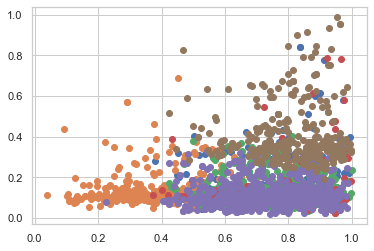

In [91]:
# assign a cluster to each example
labels = kmeans.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df.to_numpy()[row_ix, 1], df.to_numpy()[row_ix, 6])
    # show the plot
pyplot.show()

- "model" is ready, next is to get the clusters and how many observations per cluster.

In [92]:
clusters = kmeans.predict(df_scaled_df)
clusters

array([4, 4, 3, ..., 3, 4, 2], dtype=int32)

In [93]:
#clusters
pd.Series(clusters).value_counts().sort_index()

0    176
1    294
2    500
3     90
4    670
5    305
dtype: int64

- Check which cluster was assigned every song feature

In [94]:
df["cluster"] = clusters
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.654,0.819,-7.305,0.0739,0.01820,0.000029,0.2280,0.931,121.813,192434,4
1,0.758,0.913,-2.926,0.1130,0.00364,0.000069,0.1930,0.658,128.040,186210,4
2,0.763,0.777,-6.932,0.0364,0.28100,0.790000,0.1340,0.929,124.431,208600,3
3,0.729,0.851,-7.033,0.0362,0.13000,0.000912,0.4430,0.741,115.118,261267,5
4,0.690,0.752,-11.470,0.0455,0.46300,0.001020,0.5950,0.970,126.005,220667,5
...,...,...,...,...,...,...,...,...,...,...,...
2030,0.698,0.920,-8.507,0.0361,0.00327,0.002220,0.0665,0.760,119.965,265200,4
2031,0.678,0.659,-12.695,0.0396,0.02360,0.001920,0.0744,0.899,113.542,230067,4
2032,0.800,0.923,-8.963,0.0436,0.00987,0.486000,0.0687,0.849,134.993,260160,3
2033,0.705,0.927,-5.942,0.0426,0.07030,0.000000,0.0661,0.962,138.017,231533,4


In [95]:
df[df['cluster'] == 2].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
807,0.422,0.712,-5.907,0.1,0.273,0.0,0.051,0.471,78.454,261160,2


## The K parameter

- Scikitlearn Documentation

In [96]:
kmeans.inertia_

11418.434985911817

- Re-computing centroids iterations

In [97]:
kmeans2 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(df_scaled_df)
print(kmeans2.inertia_)

10517.365476500378


- Choosing K 

- "elbow method"

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

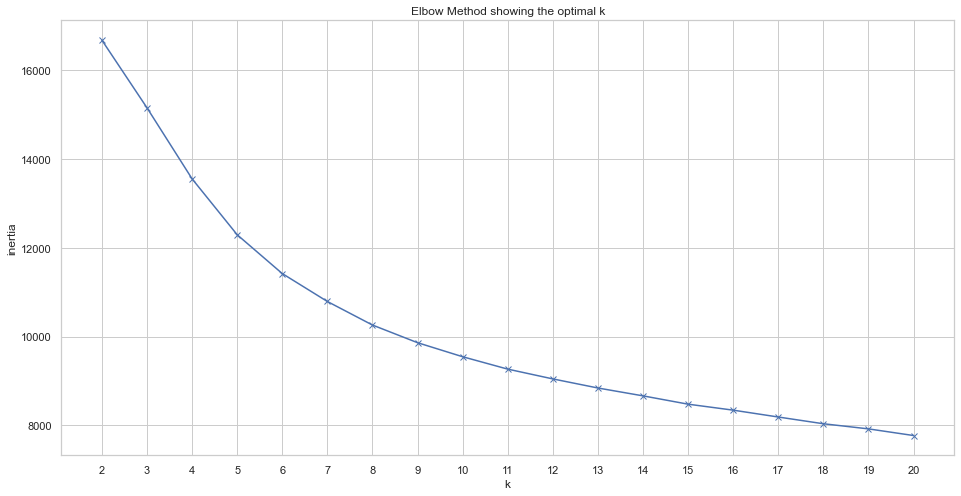

In [98]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

- Silhouette Score 

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

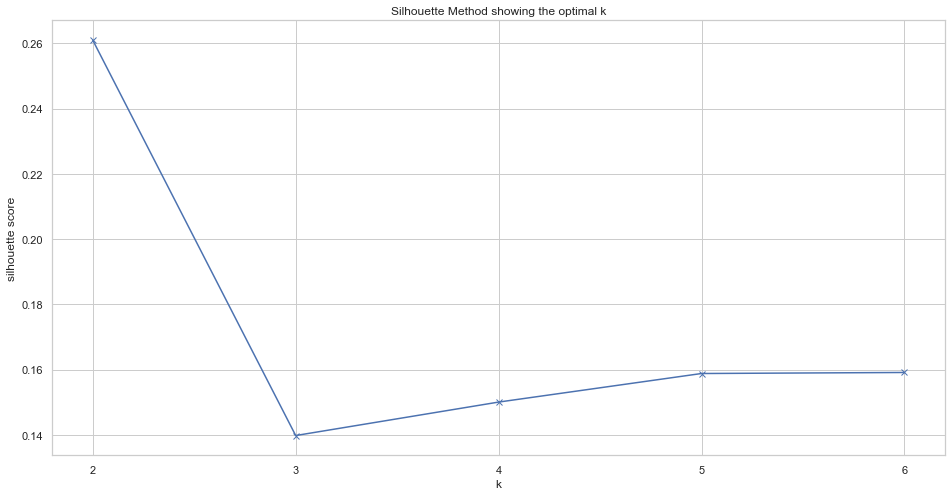

In [99]:
K = range(2, 7)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [100]:
#conda install -c districtdatalabs yellowbrick

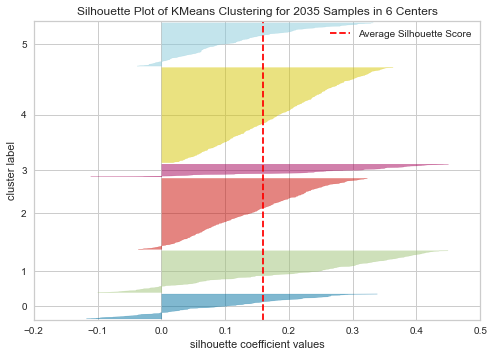

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2035 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [101]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6, random_state=1234)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Saving with pickle

In [102]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [103]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [104]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [105]:
scaler= load(filename="scaler.pickle")

In [106]:
kmeans_model = load(filename="kmeans.pickle")

In [107]:
kmeans_model

KMeans(n_clusters=6, random_state=1234)

In [108]:
scaler2 = load("scaler.pickle")

In [109]:
scaler2

StandardScaler()

In [110]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.654,0.819,-7.305,0.0739,0.01820,0.000029,0.2280,0.931,121.813,192434,4
1,0.758,0.913,-2.926,0.1130,0.00364,0.000069,0.1930,0.658,128.040,186210,4
2,0.763,0.777,-6.932,0.0364,0.28100,0.790000,0.1340,0.929,124.431,208600,3
3,0.729,0.851,-7.033,0.0362,0.13000,0.000912,0.4430,0.741,115.118,261267,5
4,0.690,0.752,-11.470,0.0455,0.46300,0.001020,0.5950,0.970,126.005,220667,5
...,...,...,...,...,...,...,...,...,...,...,...
2030,0.698,0.920,-8.507,0.0361,0.00327,0.002220,0.0665,0.760,119.965,265200,4
2031,0.678,0.659,-12.695,0.0396,0.02360,0.001920,0.0744,0.899,113.542,230067,4
2032,0.800,0.923,-8.963,0.0436,0.00987,0.486000,0.0687,0.849,134.993,260160,3
2033,0.705,0.927,-5.942,0.0426,0.07030,0.000000,0.0661,0.962,138.017,231533,4


In [111]:
#df.to_csv("cluster_2023-04-27.csv", index=False)

### GET AUDIO FEATURES

In [112]:
column_id

,id
0,000V86A5s6gAGp73ucRnmD
1,0b18g3G5spr4ZCkz7Y6Q0Q
2,3WMbD1OyfKuwWDWMNbPQ4g
3,78His8pbKjbDQF7aX5asgv
4,5lWSa1rmuSL6OBPOnkAqoa
...,...
2030,1Hh5gDiXZGhtKfHzJYYhSJ
2031,50PeqUz1BjMw9ayNTk5O4d
2032,21Vr3DuKIaMjgEaiqdJgpT
2033,7gQAFGUyHPcY0cQNPsjMf0


In [113]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'cluster'],
      dtype='object')

In [114]:
df["id"]= column_id["id"]
df1=df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'cluster']]


In [115]:
df1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.654,0.819,-7.305,0.0739,0.01820,0.000029,0.2280,0.931,121.813,192434,4
1,0.758,0.913,-2.926,0.1130,0.00364,0.000069,0.1930,0.658,128.040,186210,4
2,0.763,0.777,-6.932,0.0364,0.28100,0.790000,0.1340,0.929,124.431,208600,3
3,0.729,0.851,-7.033,0.0362,0.13000,0.000912,0.4430,0.741,115.118,261267,5
4,0.690,0.752,-11.470,0.0455,0.46300,0.001020,0.5950,0.970,126.005,220667,5
...,...,...,...,...,...,...,...,...,...,...,...
2030,0.698,0.920,-8.507,0.0361,0.00327,0.002220,0.0665,0.760,119.965,265200,4
2031,0.678,0.659,-12.695,0.0396,0.02360,0.001920,0.0744,0.899,113.542,230067,4
2032,0.800,0.923,-8.963,0.0436,0.00987,0.486000,0.0687,0.849,134.993,260160,3
2033,0.705,0.927,-5.942,0.0426,0.07030,0.000000,0.0661,0.962,138.017,231533,4


- Play with embed song player


- a sample song from cluster 0

In [116]:
def play_song(track_id):#function to call play song
    from IPython.display import IFrame
    sample = df[df['cluster'] == 0].sample()#get sample song
    track_id =sample["id"].item()#get the id of the sample song
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
play_song(track_id)#play the sample song

NameError: name 'track_id' is not defined

- a sample song from cluster 1

In [ ]:
def play_song(track_id):#function to call play song
    from IPython.display import IFrame
    sample = df[df['cluster'] == 1].sample()#get sample song
    track_id =sample["id"].item()#get the id of the sample song
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
play_song(track_id)

- a sample song from cluster 2

In [ ]:
def play_song(track_id):#function to call play song
    from IPython.display import IFrame
    sample = df[df['cluster'] == 2].sample()#get sample song
    track_id =sample["id"].item()#get the id of the sample song
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
play_song(track_id)

- a sample song from cluster 3

In [117]:
def play_song(track_id):#function to call play song
    from IPython.display import IFrame
    sample = df[df['cluster'] == 3].sample()#get sample song
    track_id =sample["id"].item()#get the id of the sample song
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
play_song(track_id)

NameError: name 'track_id' is not defined

- a sample song from cluster 4

In [ ]:
def play_song(track_id):#function to call play song
    from IPython.display import IFrame
    sample = df[df['cluster'] == 4].sample()#get sample song
    track_id =sample["id"].item()#get the id of the sample song
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
play_song(track_id)

- a sample song from cluster 5

In [ ]:
def play_song(track_id):#function to call play song
    from IPython.display import IFrame
    sample = df[df['cluster'] == 5].sample()#get sample song
    track_id =sample["id"].item()#get the id of the sample song
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
play_song(track_id)

### SCALER.TRANSFORM

- a new song features

In [118]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


track=get_playlist_tracks("spotify","37i9dQZF1EIULIRWdJnV1M")
len(track)

50

In [132]:
list_of_audio_features=[]
for item in range(0,50):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(track[item]["track"]["id"])[0])
      
list_of_audio_features


new=pd.DataFrame(list_of_audio_features)    
new=new[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

new

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.706,0.753,-4.988,0.0339,0.014300,0.000143,0.0919,0.8550,98.028,4bnutybG1itDcpyoQo2Uoc,180640
1,0.616,0.841,-4.779,0.0760,0.055900,0.002170,0.4170,0.7140,110.029,5YdnOm5990Kfq1Jodws98B,154561
2,0.633,0.927,-4.468,0.0839,0.026700,0.000000,0.0986,0.8800,146.097,22skzmqfdWrjJylampe0kt,258432
3,0.548,0.878,-4.564,0.0393,0.002970,0.166000,0.0481,0.1960,128.032,6trKaGC6bX8bl6pZJ22xQp,317283
4,0.723,0.793,-6.950,0.0287,0.162000,0.000000,0.4420,0.8930,117.972,0tb0RHrF4IpwPJOKYxnxxe,148116
5,0.710,0.826,-5.749,0.0503,0.212000,0.000000,0.2000,0.3120,117.984,6qjjJq0GtjUuwdxXP1CAbo,166790
6,0.678,0.735,-5.996,0.0617,0.234000,0.000000,0.4230,0.7100,150.091,2hBkoDhuGk2AtSCprEFDFP,144621
7,0.743,0.858,-4.016,0.0934,0.003750,0.000050,0.0374,0.3170,110.004,4OpGIkEgx8op6NQXYemSdD,176000
8,0.712,0.814,-5.123,0.1620,0.027500,0.000000,0.0652,0.5630,126.010,318quSv1UJeamoAkEDjAuY,143056
9,0.577,0.934,-3.227,0.0535,0.044100,0.000093,0.0862,0.8360,151.923,4nTsYZHFfecWk7NPXqqVyD,163317


In [133]:
sample = new[new['id'] == "2omzZ5Edn2sMpQxvARgbwj"].sample()
sample

ValueError: a must be greater than 0 unless no samples are taken

In [135]:
sample = new.sample()
#sample

In [136]:
sample.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'duration_ms'],
      dtype='object')

In [137]:
sample= sample[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]

In [138]:
sample

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1,0.616,0.841,-4.779,0.076,0.0559,0.00217,0.417,0.714,110.029,154561


In [139]:
audio_features_df = pd.read_csv('cluster_2023-04-27.csv')
audio_features_df 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.654,0.819,-7.305,0.0739,0.01820,0.000029,0.2280,0.931,121.813,192434,4
1,0.758,0.913,-2.926,0.1130,0.00364,0.000069,0.1930,0.658,128.040,186210,4
2,0.763,0.777,-6.932,0.0364,0.28100,0.790000,0.1340,0.929,124.431,208600,3
3,0.729,0.851,-7.033,0.0362,0.13000,0.000912,0.4430,0.741,115.118,261267,5
4,0.690,0.752,-11.470,0.0455,0.46300,0.001020,0.5950,0.970,126.005,220667,5
...,...,...,...,...,...,...,...,...,...,...,...
2030,0.698,0.920,-8.507,0.0361,0.00327,0.002220,0.0665,0.760,119.965,265200,4
2031,0.678,0.659,-12.695,0.0396,0.02360,0.001920,0.0744,0.899,113.542,230067,4
2032,0.800,0.923,-8.963,0.0436,0.00987,0.486000,0.0687,0.849,134.993,260160,3
2033,0.705,0.927,-5.942,0.0426,0.07030,0.000000,0.0661,0.962,138.017,231533,4


In [140]:
sample_scaled = scaler.transform(sample)
sample_scaled_df = pd.DataFrame(sample_scaled, columns = sample.columns)
print(display(sample_scaled_df.head()))

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.277724,0.703135,0.628769,-0.010633,-0.559111,-0.263086,1.663049,0.63973,-0.476633,-1.219386


None


### Prediction

In [141]:
sample_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.277724,0.703135,0.628769,-0.010633,-0.559111,-0.263086,1.663049,0.63973,-0.476633,-1.219386


In [142]:
# Predict cluster membership for a new song
predicted_cluster = kmeans_model.predict(sample_scaled_df)

# Print predicted cluster
print(predicted_cluster)

[5]


In [143]:
predicted_cluster=pd.DataFrame(predicted_cluster)[0].item()
predicted_cluster

5

### Recommend a song with the same cluster#

In [144]:
#df#playlist with the ids + clusters
#df1#playlist with NO id but clusters
#new#new songs play list
def play_song(random_song):#function to call play song
    from IPython.display import IFrame
    playing_now = predicted_cluster#input ('What cluster of song to recommend?)
    dfr=df[df["cluster"]==playing_now]
    random_song = random.choice(dfr['id'].tolist())
    return IFrame(src="https://open.spotify.com/embed/track/"+random_song,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
play_song(random_song)

### random song to check if (its hot)*** else predict its cluster and accordingly recommend a random song from a same cluster

In [145]:
#df#playlist with the ids + clusters
#df1#playlist with NO id but clusters
#new#new songs play list


In [146]:
#random_song = random.choice(new['id'].tolist())
#random_song

In [147]:
def random_song():   
    #playing_now = input ('What song are you listening to? ''')
    #random_song = random.choice(hot_songs['title'].tolist())
    from IPython.display import IFrame
    hot_songs=pd.read_csv("hot_songs_2023-04-26.csv")#hot songs
    random_hot=random.choice(hot_songs['title'].tolist())#from hot songs
    random_playlist=random.choice(df['id'].tolist())#from playlist
    random_new = random.choice(new['id'].tolist())#Input by the user (id)

    condition = (df['id'].str.casefold() == random_new.lower())#condition set        
    if df[condition]['id'].any() == True:

        def play_song(random_playlist):#function to call play song from playlist
            return IFrame(src="https://open.spotify.com/embed/track/"+random_playlist,
               width="320",
               height="80",
               frameborder="0",
               allowtransparency="true",
               allow="encrypted-media",
              )
        play_song(random_playlist)
        #hot song part is missing beause the hot song list does not have id, only name of song and artists
    else:
        sample = new.sample()
        sample= sample[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                       'instrumentalness', 'liveness', 'valence', 'tempo',
                       'duration_ms']]
        audio_features_df = pd.read_csv('cluster_2023-04-27.csv')
        sample_scaled = scaler.transform(sample)
        sample_scaled_df = pd.DataFrame(sample_scaled, columns = sample.columns)
        # Predict cluster membership for a new song
        predicted_cluster = kmeans_model.predict(sample_scaled_df)
        # Print predicted cluster    
        predicted_cluster=pd.DataFrame(predicted_cluster)[0].item()

        def play_song(random_song):#function to call play song        
            from IPython.display import IFrame
            playing_now = predicted_cluster#input ('What cluster of song to recommend?)
            dfr=df[df["cluster"]==playing_now]
            random_song = random.choice(dfr['id'].tolist())
            return IFrame(src="https://open.spotify.com/embed/track/"+random_song,
                       width="320",
                       height="80",
                       frameborder="0",
                       allowtransparency="true",
                       allow="encrypted-media",
                      )
        play_song(random_song)



hot_songs=pd.read_csv("hot_songs_2023-04-26.csv")#hot songs
random_hot=random.choice(hot_songs['title'].tolist())#from hot songs
random_playlist=random.choice(df['id'].tolist())#from playlist
random_new = random.choice(new['id'].tolist())#Input by the user (id)

condition = (df['id'].str.casefold() == random_new.lower())#condition set 

In [148]:
hot_songs=pd.read_csv("hot_songs_2023-04-26.csv")#hot songs
random_hot=random.choice(hot_songs['title'].tolist())#from hot songs
random_playlist=random.choice(df['id'].tolist())#from playlist
random_new = random.choice(new['id'].tolist())#Input by the user (id)

condition = (df['id'].str.casefold() == random_new.lower())#condition set 

In [150]:
#It does not play the song
#playing_now = input ('What song are you listening to? ''')
#random_song = random.choice(hot_songs['title'].tolist())
from IPython.display import IFrame
hot_songs=pd.read_csv("hot_songs_2023-04-26.csv")#hot songs
random_hot=random.choice(hot_songs['title'].tolist())#from hot songs
random_playlist=random.choice(df['id'].tolist())#from playlist
random_new = random.choice(new['id'].tolist())#Input by the user (id)

condition = (df['id'].str.casefold() == random_new.lower())#condition set        
if df[condition]['id'].any() == True:

    def play_song(random_playlist):#function to call play song from playlist
         return IFrame(src="https://open.spotify.com/embed/track/"+random_playlist,
               width="320",
               height="80",
               frameborder="0",
               allowtransparency="true",
               allow="encrypted-media",
              )
    play_song(random_playlist)
        #hot song part is missing beause the hot song list does not have id, only name of song and artists
else:
    sample = new.sample()
    sample= sample[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                       'instrumentalness', 'liveness', 'valence', 'tempo',
                       'duration_ms']]
    audio_features_df = pd.read_csv('cluster_2023-04-27.csv')
    sample_scaled = scaler.transform(sample)
    sample_scaled_df = pd.DataFrame(sample_scaled, columns = sample.columns)
     # Predict cluster membership for a new song
    predicted_cluster = kmeans_model.predict(sample_scaled_df)
        # Print predicted cluster    
    predicted_cluster=pd.DataFrame(predicted_cluster)[0].item()

    def play_song(random_song):#function to call play song        
        from IPython.display import IFrame
        playing_now = predicted_cluster#input ('What cluster of song to recommend?)
        dfr=df[df["cluster"]==playing_now]
        random_song = random.choice(dfr['id'].tolist())
        return IFrame(src="https://open.spotify.com/embed/track/"+random_song,
                       width="320",
                       height="80",
                       frameborder="0",
                       allowtransparency="true",
                       allow="encrypted-media",
                      )
        #def playit():
         #   play_song(random_song)
   # playit()

In [151]:
#df.to_csv(f"playlist_{today}.csv",encoding='ISO-8859-1', index = False)
#new.to_csv("new_songlist.csv")

In [152]:
def get_audio_feature(x):
    find_a_song = sp.search(x, limit=1, market="GB")
    song_features_dict_df = pd.DataFrame(sp.audio_features(find_a_song["tracks"]["items"][0]["id"]))
    song_features_dict_df = song_features_dict_df.drop(['key', 'mode', 'type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'id'], axis=1)
    return song_features_dict_df

In [153]:
get_audio_feature("Flowers")

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455


### FINAL DAY: PRESENTATION. WEEK6, DAY5

In [154]:

#playing_now = input ('Which name of the song are you listening to? ''').lower()
#random_hot = random.choice(hot_songs['title'].tolist())#hot_songs['title'].sample().item() or hot_songs['title'].sample().item()
x = input ('Which name of the song are you listening to? ''').lower()
y = random.choice(hot_songs['title'].tolist())#hot_songs['title'].sample().item() or hot_songs['title'].sample().item()

artist = hot_songs.loc[hot_songs['title'] == y,'artist'].item()
closest_match = process.extractOne(x, hot_songs['title'])
result=sp.search(q=y+artist,limit=1,market="GB")
#find_asong = sp.search(x, limit=1, market="GB")

condition = (hot_songs['title'].str.casefold() == x.lower())

if hot_songs[condition]['title'].any() == True:
    print("Nice!, your input is in the Hot List! You might also like:", y ,"by", hot_songs.loc[hot_songs['title'] == y,'artist'].item())
    #print("Nice!, your input is in the Hot List! You might also like:", y ,"by", random_hot)
    #resultr=sp.search(q=random_hot,limit=1,market="GB")
    #song_idr = resultr["tracks"]["items"][0]["id"]
    #display(play_song(song_idr)
    
    #print("And you get another hot song:", y ,"by", hot_songs.loc[hot_songs['title'] == y,'artist'].item()) 
        #if y!=x:
         #   print("Great taste! You might also like:", y ,"by", hot_songs.loc[hot_songs['title'] == y,'artist'].item())
        #else:
         #   c = hot_songs['title'].sample().item()
          #  print("Great taste! You might also like:", c ,"by", hot_songs.loc[hot_songs['title'] == c,'artist'].item())
else:
    print('Opps!, your input is not in not the Hot List! Did you mean:',closest_match[0],"by", hot_songs.loc[hot_songs['title'] == closest_match[0],'artist'].item(),"?")
    a = input("Input Y or N:")
    if a in ["Y","y"]:
        
        print("OK! You might also like:", y ,"by", artist)
        song_id=result["tracks"]["items"][0]["id"]

    else:
        result2=sp.search(q=x,limit=1,market="GB")
        song_id = result2["tracks"]["items"][0]["id"]
        print("Did you mean:",result2["tracks"]["items"][0]["name"],"by",result2["tracks"]["items"][0]["artists"][0]["name"],"?")
        a = input("Input Y or N:")
        if a in ["Y","y"]:

            print("OK! Enjoy:", y ,"by", artist)
            song_id=result["tracks"]["items"][0]["id"]
        else:  
            
            song_features_dict_df= get_audio_feature(x)
           
            # transform them
            song_features_scaled = scaler.transform(song_features_dict_df)
            song_features_scaled_df = pd.DataFrame(song_features_scaled, columns = song_features_dict_df.columns)
            # predict
            cluster = kmeans.predict(song_features_scaled_df)
            cluster = cluster[0]
            # recommend it
             # get random song
            random_song_with_same_cluster = df[(df['cluster'] == cluster)].sample(n=1)
             # get the id of this song
            id_random_song = str(random_song_with_same_cluster['id'].values[0])
            # play it
            display(play_song(id_random_song))
                    #print("Ohh no! Then enjoy this for now:",result2["tracks"]["items"][0]["name"],"by",result2["tracks"]["items"][0]["artists"][0]["name"],"?")

        

            
         
#play_song(song_id)

Which name of the song are you listening to? flowrs
Opps!, your input is not in not the Hot List! Did you mean: Flowers by Miley Cyrus ?
Input Y or N:n
Did you mean: Flowers by Miley Cyrus ?
Input Y or N:n


- Enjoy the Recommndation. Jane is Happy